# xray demo at NANOOS DMAC meeting in Portland
11/13/2015. My first real tests with xray. Used env "dmac_cmop_nov15"

In [1]:
%matplotlib inline
import xray

In [2]:
cd '/home/mayorga/Desktop/LongTimeSeries/CraigExmplCF1_6ncfile'

/usr/mayorgadat/workmain/APL/NVS/LongTimeSeries/CraigExmplCF1_6ncfile


In [3]:
ndbcx = xray.open_dataset('NDBC46050v3.nc')

In [4]:
print(ndbcx)

<xray.Dataset>
Dimensions:                (bnds: 2, position: 1, time: 245448)
Coordinates:
    latitude               float32 44.66
    longitude              (position) float32 235.474
  * time                   (time) datetime64[ns] 1987-01-01 ...
    depth                  (position) float32 -1.0
  * bnds                   (bnds) int64 0 1
  * position               (position) int64 0
Data variables:
    station_name           (position) int32 0
    time_bnds              (time, bnds) datetime64[ns] 1986-12-31T23:30:00 ...
    sea_water_temperature  (time) float64 nan nan nan nan nan nan nan nan ...
Attributes:
    title: Hourly NDBC 46050 data
    publisher_name: Craig Risien
    publisher_email: crisien@coas.oregonstate.edu
    institution: Oregon State University, College of Earth, Ocean, and Atmospheric Sciences
    date_created: 2015-11-13T12:51:22
    date_modified: 2015-11-13T12:51:22
    history: Quality controlled at NOAA NDBC
    time_coverage_start: 1987-01-01T00:00:00
 

In [5]:
ndbcx.dims['time'], ndbcx.time_coverage_end, ndbcx.time_coverage_start

(245448, u'2014-12-31T23:00:00', u'1987-01-01T00:00:00')

In [6]:
ndbcx.attrs.keys()

[u'title',
 u'publisher_name',
 u'publisher_email',
 u'institution',
 u'date_created',
 u'date_modified',
 u'history',
 u'time_coverage_start',
 u'time_coverage_end',
 u'time_coverage_resolution',
 u'geospatial_lat_min',
 u'geospatial_lat_max',
 u'geospatial_lat_units',
 u'geospatial_lon_min',
 u'geospatial_lon_max',
 u'geospatial_lon_units',
 u'geospatial_vertical_min',
 u'geospatial_vertical_max',
 u'geospatial_vertical_units',
 u'geospatial_vertical_resolution',
 u'geospatial_vertical_positive',
 u'keywords',
 u'keyword_vocabulary',
 u'Conventions',
 u'comments',
 u'cdm_data_type',
 u'featureType',
 u'data_type',
 u'area',
 u'license',
 u'citation',
 u'acknowledgement',
 u'wmo_platform_code',
 u'summary',
 u'naming_authority']

In [7]:
len(ndbcx.sea_water_temperature)

245448

In [8]:
# This must be a count of valid (non-nan) value,
# while len() gives counts all values (length of array)
ndbcx.sea_water_temperature.count()

<xray.DataArray 'sea_water_temperature' ()>
array(188577)
Coordinates:
    latitude  float64 44.66

### Get and manipulate variable units attribute

In [9]:
ndbcx.sea_water_temperature.units

u'degree_Celsius'

In [10]:
ndbcx.sea_water_temperature.units = 'Kelvin'

In [11]:
ndbcx.sea_water_temperature.units

u'degree_Celsius'

In [12]:
ndbcx.sea_water_temperature.attrs['units'] = 'xx'

#### Notice that in addition to time, only latitude is associated with sea_water_temperature as a coordinate variable. Look into this. Reexamine the nc file, there may be something wrong

In [13]:
ndbcx.sea_water_temperature

<xray.DataArray 'sea_water_temperature' (time: 245448)>
array([ nan,  nan,  nan, ...,  nan,  nan,  nan])
Coordinates:
  * time      (time) datetime64[ns] 1987-01-01 1987-01-01T01:00:00 ...
    latitude  float64 44.66
Attributes:
    units: xx
    cell_methods: time: mean (interval: 1 hour comment: time indicates center hour)
    long_name: Hourly Sea Water Temperature
    standard_name: sea_water_temperature
    sensor_mount: mounted on mooring bridal
    valid_min: -2.0
    valid_max: 30.0

In [14]:
ndbcx.attrs['emilio'] = 'mayorga'

In [15]:
ndbcx.attrs.keys()

[u'title',
 u'publisher_name',
 u'publisher_email',
 u'institution',
 u'date_created',
 u'date_modified',
 u'history',
 u'time_coverage_start',
 u'time_coverage_end',
 u'time_coverage_resolution',
 u'geospatial_lat_min',
 u'geospatial_lat_max',
 u'geospatial_lat_units',
 u'geospatial_lon_min',
 u'geospatial_lon_max',
 u'geospatial_lon_units',
 u'geospatial_vertical_min',
 u'geospatial_vertical_max',
 u'geospatial_vertical_units',
 u'geospatial_vertical_resolution',
 u'geospatial_vertical_positive',
 u'keywords',
 u'keyword_vocabulary',
 u'Conventions',
 u'comments',
 u'cdm_data_type',
 u'featureType',
 u'data_type',
 u'area',
 u'license',
 u'citation',
 u'acknowledgement',
 u'wmo_platform_code',
 u'summary',
 u'naming_authority',
 'emilio']

In [16]:
# Note that since I didn't specy the format or engine parameters,
# v3.nc was probably written out as a netcdf4 file (HDF5)
ndbcx.to_netcdf('v3.nc')

In [17]:
swt_df = ndbcx.sea_water_temperature.to_dataframe()
swt_df.head()

,latitude,sea_water_temperature
time,,
1987-01-01 00:00:00,44.655998,NaN
1987-01-01 01:00:00,44.655998,NaN
1987-01-01 02:00:00,44.655998,NaN
1987-01-01 03:00:00,44.655998,NaN
1987-01-01 04:00:00,44.655998,NaN


In [18]:
swt_df.index.min(), swt_df.index.max(), ndbcx.sea_water_temperature.time.max()

(Timestamp('1987-01-01 00:00:00'),
 Timestamp('2014-12-31 23:00:00'),
 <xray.DataArray 'time' ()>
 numpy.datetime64('2014-12-31T15:00:00.000000000-0800')
 Coordinates:
     latitude  float64 44.66)

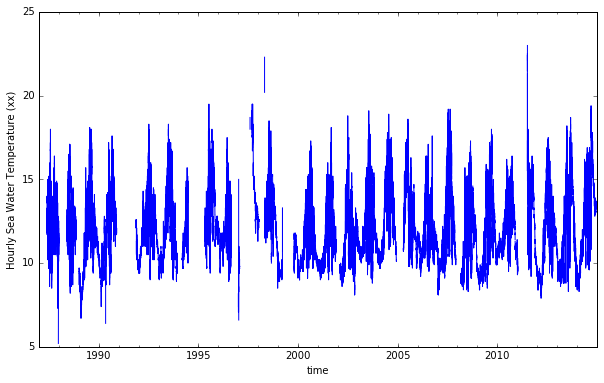

In [19]:
import matplotlib.pyplot as plt
ndbcx.sea_water_temperature.to_dataframe()['sea_water_temperature'].plot(figsize=(10,6))
ylabel = "%s (%s)" % (ndbcx.sea_water_temperature.long_name, 
                      ndbcx.sea_water_temperature.units)
plt.ylabel(ylabel);